# CSCA 5632 Final Project
## Food Nutrient Density Clustering and Classification

## Step 1:
### Data Source and Setup:
Reference: https://www.kaggle.com/datasets/utsavdey1410/food-nutrition-dataset

The dataset is sourced from Kaggle and it revolves around multiple features on the nutritional value of foods.

**Column Descriptions**

* Food: The name or type of the food item.
* Caloric Value: Total energy provided by the food, typically measured in kilocalories (kcal) per 100 grams.
* Fat( in g): Total amount of fats in grams per 100 grams, including the breakdowns that follow.
* Saturated Fats( in g): Amount of saturated fats (fats that typically raise the level of cholesterol in the blood) in grams per 100 grams.
* Monounsaturated Fats( in g): Amount of monounsaturated fats (considered heart-healthy fats) in grams per 100 grams.
* Polyunsaturated Fats( in g): Amount of polyunsaturated fats (include essential fats your body needs but can't produce itself) in grams per 100 grams.
* Carbohydrates( in g): Total carbohydrates in grams per 100 grams, including sugars.
* Sugars( in g): Total sugars in grams per 100 grams, a subset of carbohydrates.
* Protein( in g): Total proteins in grams per 100 grams, essential for body repair and growth.
* Dietary Fiber( in g): Fiber content in grams per 100 grams, important for digestive health.
* Cholesterol( in mg): Cholesterol content in milligrams per 100 grams, pertinent for cardiovascular health.
* Sodium( in g): Sodium content in milligrams per 100 grams, crucial for fluid balance and nerve function.
* Water( in g): Water content in grams per 100 grams, which affects the food’s energy density.
* Vitamin A( in mg): Amount of Vitamin A in micrograms per 100 grams, important for vision and immune functioning.
* Vitamin B1 (Thiamine)( in mg): Essential for glucose metabolism.
* Vitamin B11 (Folic Acid)( in mg): Crucial for cell function and tissue growth, particularly important in pregnancy.
* Vitamin B12( in mg): Important for brain function and blood formation.
* Vitamin B2 (Riboflavin)( in mg): Necessary for energy production, cell function, and fat metabolism.
* Vitamin B3 (Niacin)( in mg): Supports digestive system, skin, and nerves health.
* Vitamin B5 (Pantothenic Acid)( in mg): Necessary for making blood cells, and helps convert food into energy.
* Vitamin B6( in mg): Important for normal brain development and keeping the nervous and immune systems healthy.
* Vitamin C( in mg): Important for the repair of all body tissues.
* Vitamin D( in mg): Crucial for the absorption of calcium, promoting bone growth and health.
* Vitamin E( in mg): Acts as an antioxidant, helping to protect cells from the damage caused by free radicals.
* Vitamin K( in mg): Necessary for blood clotting and bone health.
* Calcium( in mg): Vital for building and maintaining strong bones and teeth.
* Copper( in mg): Helps with the formation of collagen, increases the absorption of iron and plays a role in energy production.
* Iron( in mg): Essential for the creation of red blood cells.
* Magnesium( in mg): Important for many processes in the body including regulation of muscle and nerve function, blood sugar levels, and blood pressure and making protein, bone, and DNA.
* Manganese( in mg): Involved in the formation of bones, blood clotting factors, and enzymes that play a role in fat and carbohydrate metabolism, calcium absorption, and blood sugar regulation.
* Phosphorus( in mg): Helps with the formation of bones and teeth and is necessary for the body to make protein for the growth, maintenance, and repair of cells and tissues.
* Potassium( in mg): Helps regulate fluid balance, muscle contractions, and nerve signals.
* Selenium( in mg): Important for reproduction, thyroid gland function, DNA production, and protecting the body from damage caused by free radicals and from infection.
* Zinc( in mg): Necessary for the immune system to properly function and plays a role in cell division, cell growth, wound healing, and the breakdown of carbohydrates.
* Nutrition Density: A metric indicating the nutrient richness of the food per calorie.

In [ ]:
## Import required packages

import pandas as pd
from collections import Counter
import locale
from matplotlib import pyplot as plt
import seaborn
import numpy as np
import itertools
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, precision_score, make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import ParameterGrid, GridSearchCV, train_test_split

In [ ]:
import warnings
warnings.filterwarnings('ignore') # To clean up cell output

## Step 2:
### Problem Statement:
Unsupervised and Supervised Machine Learning will be utilized to determine the nutritional value of foods. The goal is to use the "Nutrition Density" column as the focus to rank food quality on. It is currently in numeric form, so to turn this into a classification problem, several buckets will be created based on the columns value range so that ordinal targets can be used.

Nutrient density means the relative amount of nutrients per calorie, while energy density simply refers to the total caloric value. Specifically, it identifies the amount of beneficial nutrients in food products in proportion to the total caloric value and detrimental nutrients.

* https://www.eufic.org/en/understanding-science/article/what-is-nutrient-density
* https://en.wikipedia.org/wiki/Nutrient_density

By using machine learning, we can rank the nutritional value of foods.

## Step 3:
#### Exploratory Data Analysis
Inspect, visualize, and clean the data as required.

In [ ]:
## Load and display the train news data

data_filepath = "data" # Filepath may need altering based on data location
data_files = glob.glob(data_filepath + "/*.csv")
data = pd.DataFrame()
for filepath in data_files:
  data_single = pd.read_csv(filepath, engine = "python")
  data = pd.concat([data, data_single])
data = data.reset_index(drop = True)
data

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,eggnog,224,10.600,6.600,3.300,0.500,20.4,20.400,...,330.2,0.051,0.500,48.300,0.024,276.900,419.1,0.094,1.200,377.200
1,1,1,beer light,96,0.000,0.000,0.000,0.000,5.4,0.300,...,13.2,0.095,0.014,16.500,0.094,39.600,69.3,0.077,0.044,19.456
2,2,2,beer budweiser,12,0.000,0.000,0.000,0.000,0.9,0.000,...,1.2,0.095,0.000,2.100,0.038,3.800,9.7,0.000,0.000,2.200
3,3,3,weizenbier erdinger,220,18.000,13.000,1.000,0.000,0.0,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,18.000
4,4,4,beer light budweiser,9,0.000,0.000,0.000,0.000,0.4,0.000,...,0.9,0.088,0.000,2.100,0.007,3.200,7.7,0.000,0.000,1.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,717,717,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,...,15.8,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,718,718,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,...,0.0,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,719,719,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,...,0.0,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,720,720,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,...,2.6,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


I have loaded the data in a loop since the source dataset was a collection of 5 csv files. Therefore, using pandas concat I create one dataframe to reference for this project. Initial examination:

* The total number of observations is 2395.
* There is the target column "Nutrition Density".
* There are 2 "Unamed" columns that appear to reference the index, which will be dropped.
* There are 34 explanatory variables that we will explore for the unsupervised machine learning process.

After dropping the uneeded columns, I will examine the datatypes:

In [ ]:
## Drop uneeded columns and display general information
data.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   float64
 3   Saturated Fats        2395 non-null   float64
 4   Monounsaturated Fats  2395 non-null   float64
 5   Polyunsaturated Fats  2395 non-null   float64
 6   Carbohydrates         2395 non-null   float64
 7   Sugars                2395 non-null   float64
 8   Protein               2395 non-null   float64
 9   Dietary Fiber         2395 non-null   float64
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   float64
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11          

In [ ]:
## Display data statistics
data.describe()

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,223.769520,10.176276,3.924917,4.133622,2.152844,18.589021,4.457459,13.400777,2.235790,62.171937,...,52.047728,9.581689,1.853271,34.429792,5.349964,156.236052,303.833939,52.258006,1.579192,106.929006
std,384.728244,29.008915,19.502262,12.939587,7.145738,29.406134,13.339929,32.294246,5.404483,385.352876,...,115.933379,69.912400,5.155650,71.927990,21.005332,333.257099,589.507589,199.257203,4.937509,173.023891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.500000,0.300000,0.064000,0.058000,0.071000,0.500000,0.000000,0.800000,0.000000,0.000000,...,0.600000,0.040000,0.100000,1.500000,0.037000,0.800000,27.750000,0.016000,0.055000,16.876500
50%,117.000000,2.100000,0.500000,0.500000,0.400000,6.800000,0.086000,3.500000,0.200000,0.000000,...,13.900000,0.100000,0.600000,10.400000,0.200000,42.300000,112.300000,0.053000,0.300000,53.840000
75%,258.000000,9.400000,2.700000,3.400000,1.700000,25.050000,3.200000,13.300000,2.200000,26.450000,...,48.250000,0.400000,1.800000,36.950000,0.700000,171.350000,340.500000,0.090000,1.200000,135.074500
max,6077.000000,550.700000,672.000000,291.100000,188.000000,390.200000,291.500000,560.300000,76.500000,10509.000000,...,1283.500000,1890.000000,121.200000,921.600000,451.000000,5490.000000,11336.900000,3308.000000,147.300000,3911.400000


From further examination, every explanatory variable is of numeric form, all being float values aside from "Caloric Value". Due to this, no transformations such tf-idf, one hot encoding, or dummy variable setup will be required. However, I will now examine and create appropriate buckets for the dependent variable "Nutrition Density".

Also, since Nutrient Density already accounts for ratios of nutrients, I will not have to transform the data in ways such as min-max scaler to adjust for total calories, since the food quantities vary (generally, it would be better to set the caloric value to the same for all foods and adjust the nutrients proprotionally, though that is not needed since the target value is already calculated).

Finally, it may be good to reduce the total number of input features through dimensionality reduction.

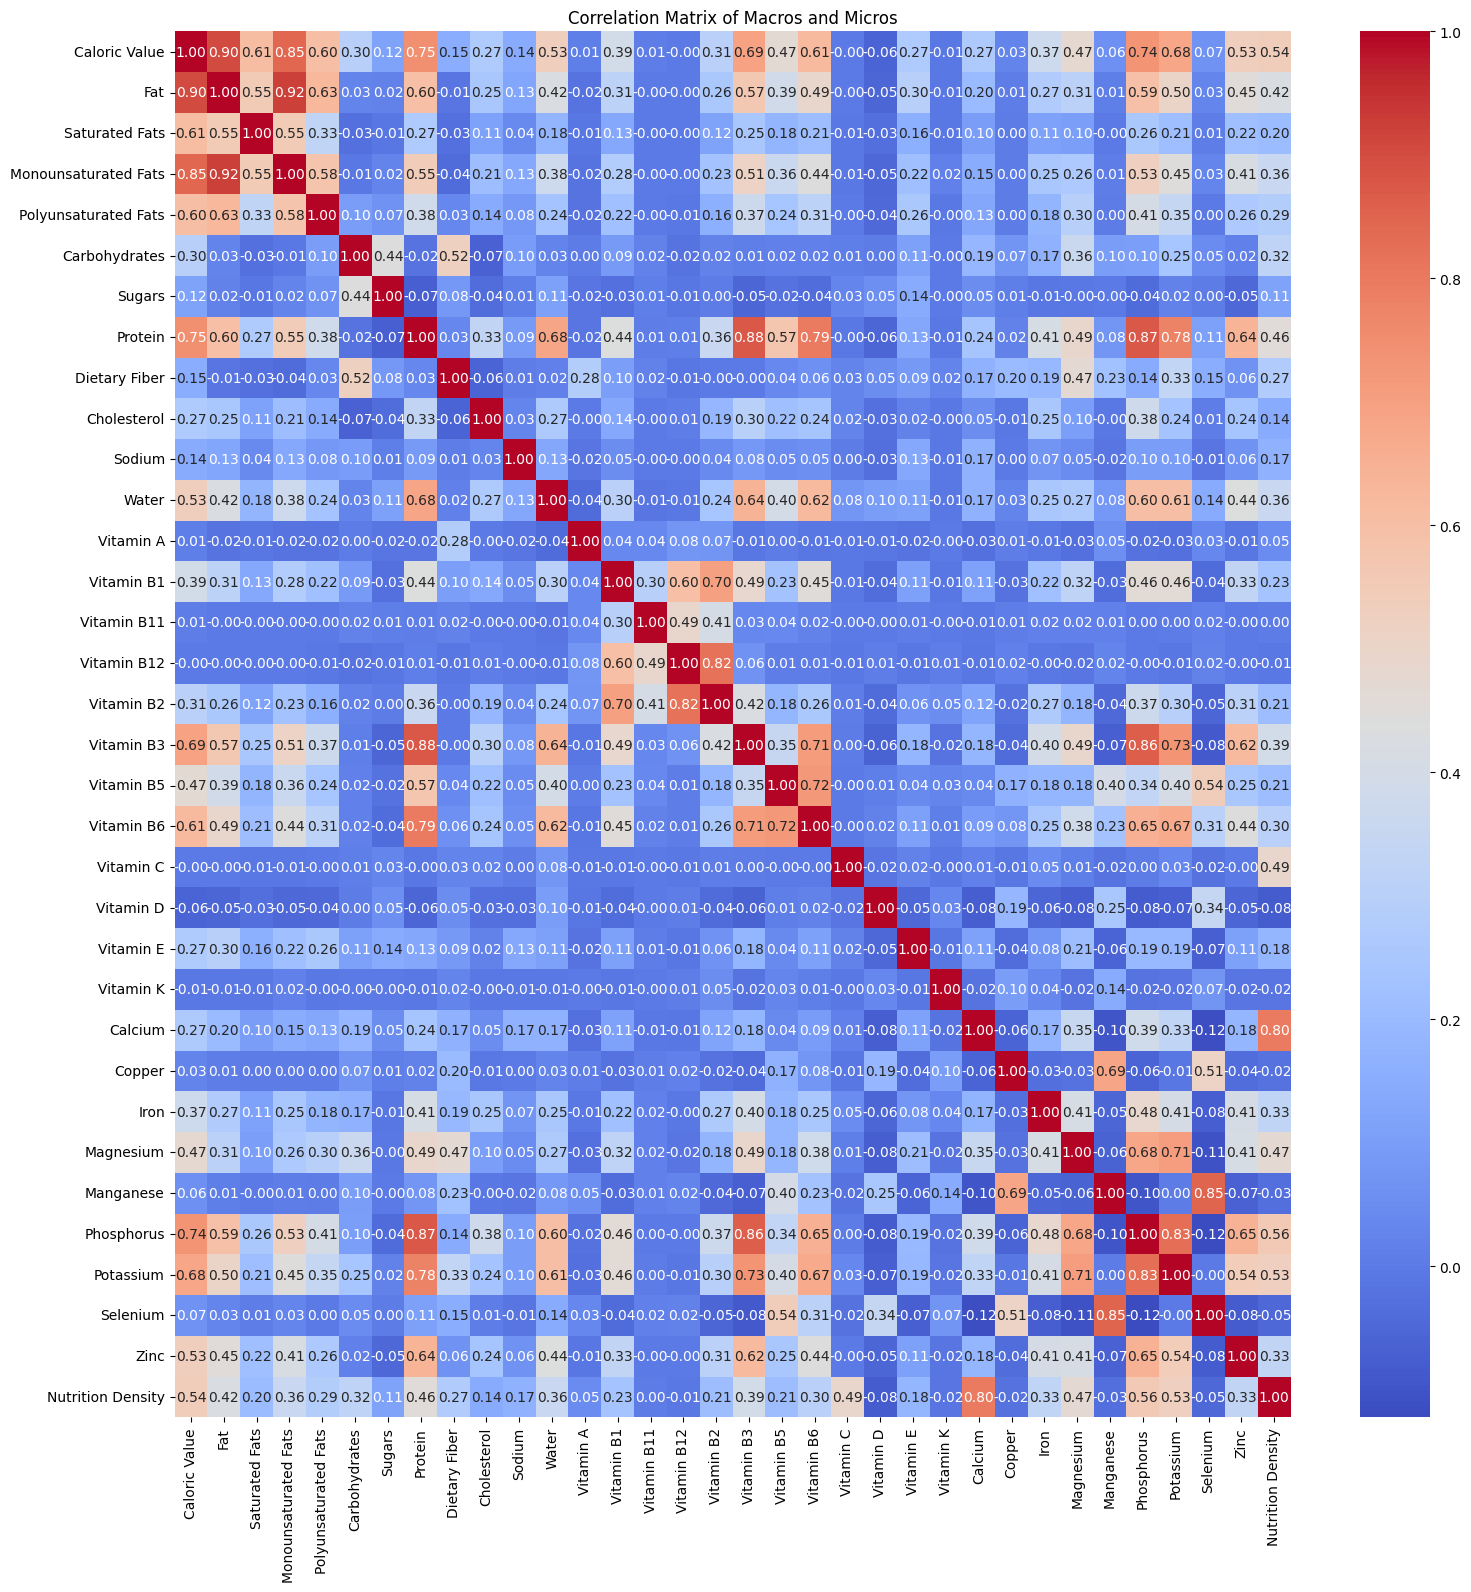

In [ ]:
## Visualize the feature correlations

numeric_cols = data.select_dtypes(include=np.number).columns
numeric_data = data[numeric_cols]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(18, 18))
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Macros and Micros')
plt.show()

The above correlation matrix indicates that most of the of the features are not correlated, at least not strongly so. Therefore, merging / removing features initially should not have a significant impact due to the lack of multicollinearity.

Histograms will now be generated to visualize the Nutrition Density distribution for catagorical transformation considerations.

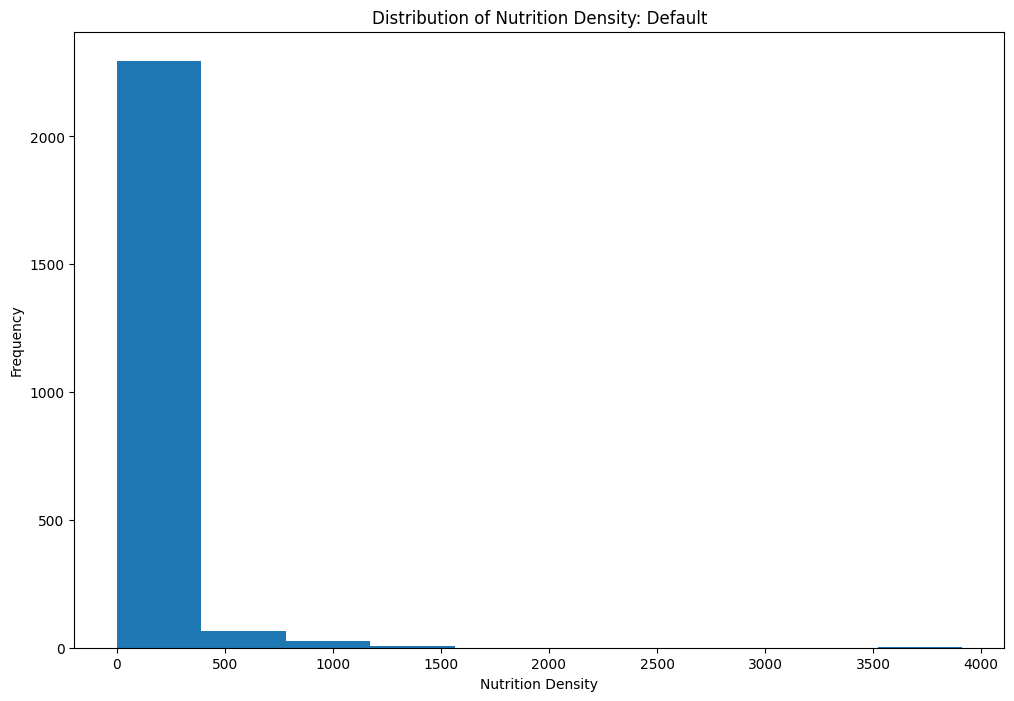

In [ ]:
## Default histogram

plt.figure(figsize=(12, 8))
plt.hist(data["Nutrition Density"])
plt.xlabel("Nutrition Density")
plt.ylabel("Frequency")
plt.title(f"Distribution of Nutrition Density: Default")
plt.show()

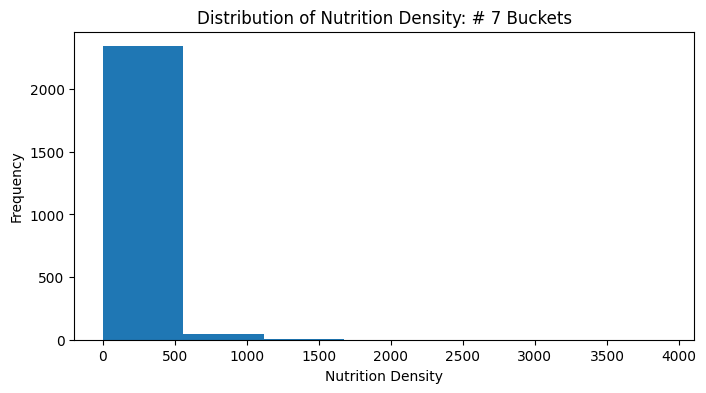

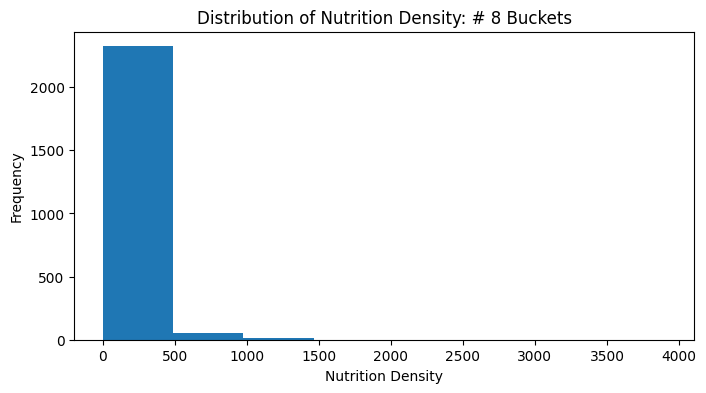

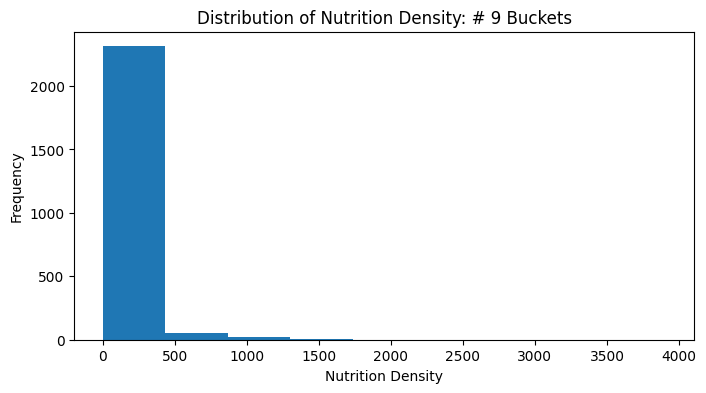

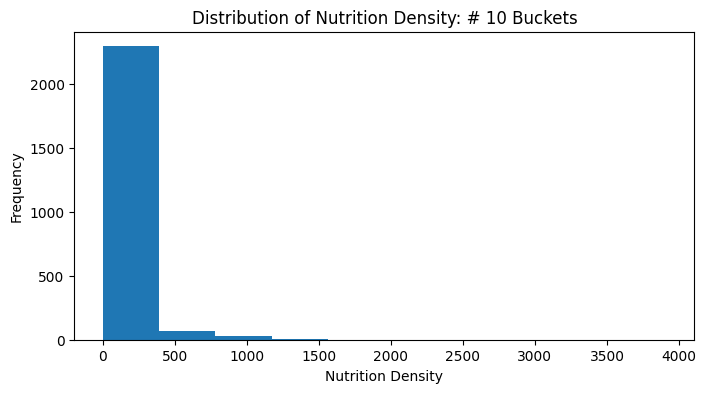

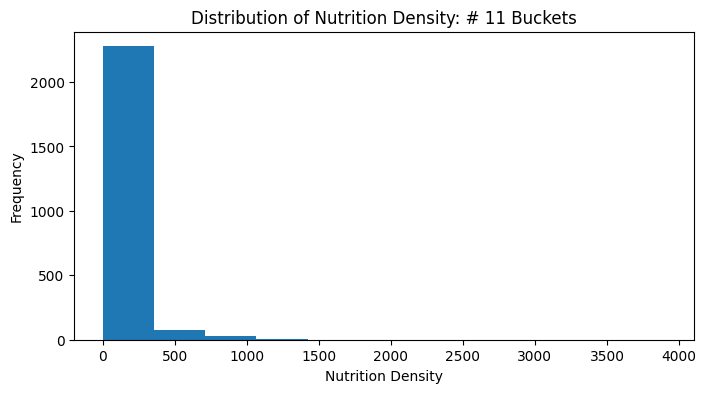

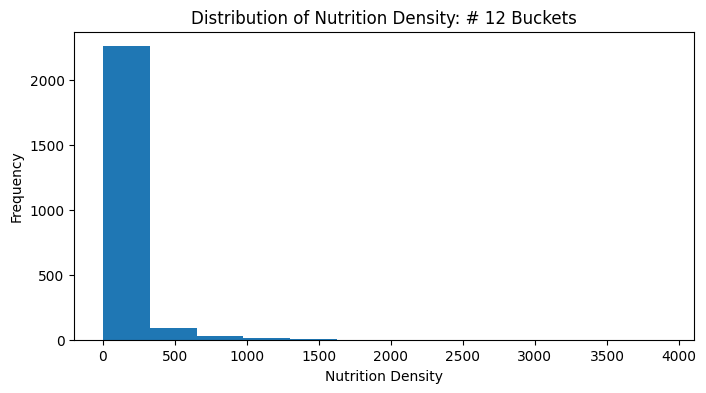

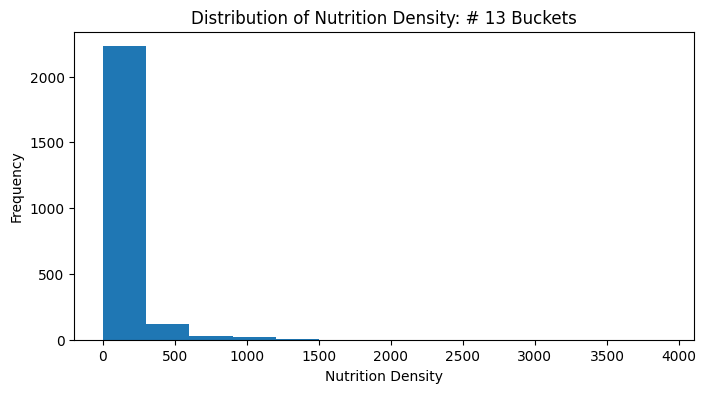

In [ ]:
## Generate histograms of the Nutrition Density column using different bucket sizes

for i in range(7,14):
  plt.figure(figsize=(8, 4))
  plt.hist(data["Nutrition Density"], bins = i)
  plt.xlabel("Nutrition Density")
  plt.ylabel("Frequency")
  plt.title(f"Distribution of Nutrition Density: # {i} Buckets")
plt.show()

Based on the default histogram, it appears there are 3 relatively sizeable buckets, therefore 3 classes would be the transformed target range for the supervised classification portion. Let's view some of the greatest and least nutritional foods:

In [ ]:
## Filter data by the 15 foods with the highest Nutrition Density

top_15_foods = data.sort_values(by='Nutrition Density', ascending=False).head(15)
top_15_foods

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
1543,acerola cherry juice,56,0.7,0.2,0.2,0.2,11.6,10.9,1.0,0.7,...,24.2,0.200,1.200,29.0,0.000,21.8,234.7,0.061,0.2,3911.400
156,banana cream pie,3190,161.3,44.6,67.8,39.0,390.2,143.0,52.2,8.3,...,889.5,0.600,12.300,189.8,1.800,1091.1,1956.9,0.100,5.7,1533.500
354,mexican cheese,316,21.7,13.0,5.6,0.8,3.8,0.6,27.7,0.0,...,1283.5,0.034,0.100,39.2,0.000,653.0,104.2,0.006,4.8,1337.000
1634,sisymbrium seeds,235,3.4,0.7,1.1,1.5,43.1,0.0,9.0,0.0,...,1208.4,0.052,0.098,232.4,1.100,4.4,1576.2,0.000,0.2,1286.643
1376,pork arm picnic cooked,5292,322.7,109.3,139.0,62.7,0.0,0.0,560.3,0.0,...,360.3,2.400,20.700,495.4,0.500,5404.8,8039.6,0.700,69.8,1264.074
1374,pork arm picnic raw,5298,343.4,113.6,147.3,67.9,0.0,0.0,513.6,0.0,...,329.4,2.000,15.600,494.1,0.300,5490.0,11336.9,0.600,59.0,1202.100
356,mozzarella cheese fat free,159,0.0,0.0,0.0,0.0,4.0,1.7,35.8,2.0,...,1085.9,0.077,0.400,37.3,0.000,741.3,119.8,0.035,4.4,1128.200
1437,goose meat raw,6077,550.7,160.2,291.1,61.6,0.0,0.0,259.8,0.0,...,196.6,4.400,41.000,294.8,0.300,3832.9,5045.0,0.200,28.2,1117.200
336,gjetost cheese,1058,67.0,43.5,17.9,2.1,96.8,0.0,21.9,0.0,...,908.0,0.200,1.200,158.9,0.035,1007.9,3198.4,0.039,2.6,1095.700
357,provolone cheese,463,35.1,22.5,9.8,1.0,2.8,0.7,33.8,0.0,...,997.9,0.011,0.700,37.0,0.033,654.7,182.2,0.017,4.3,1070.600


In [ ]:
## Filter data by the 15 foods with the least Nutrition Density

top_15_foods = data.sort_values(by='Nutrition Density', ascending=False).tail(15).iloc[::-1]
top_15_foods

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
1546,apple juice martinellis,122,0.000,0.0,29.1,0.7,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
211,eisbonbons mac iver,23,0.000,0.0,5.6,4.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
77,baking soda,0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.018,0.00,0.000
192,milk chocolate with rice cereal,0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
16,gin,53,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.007,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
1663,nesfit diet cereal nestle,75,0.000,14.5,2.8,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
1573,pesca tea santal,116,0.000,28.1,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
1200,veal shoulder raw,0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
1554,cola light coca cola,0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
1564,club soda,0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,10.000,0.015,0.078,2.000,0.052,0.0,4.000,0.00,0.025


## Create the Target Column
A histogram will be used to obtain the bucket thresholds to use for transforming the "Nutrition Density" column from continuous to categorical, resulting in the new target column "Nutrition Ranking".

In [ ]:
## Create a column called Nutrition Ranking that converts the Nutrition Density column into buckets using hist

hist, bin_edges = np.histogram(data["Nutrition Density"], bins = 4)
print(f"Bin bounds to use: {hist}")
data['Nutrition Ranking'] = pd.cut(data['Nutrition Density'], bins=np.sort(hist), labels = False, include_lowest=True)
data = data.dropna()
data

Bin bounds to use: [2379   15    0    1]


,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Nutrition Ranking
0,eggnog,224,10.600,6.600,3.300,0.500,20.4,20.400,11.600,0.000,...,0.051,0.500,48.300,0.024,276.900,419.1,0.094,1.200,377.200,2.0
1,beer light,96,0.000,0.000,0.000,0.000,5.4,0.300,0.800,0.000,...,0.095,0.014,16.500,0.094,39.600,69.3,0.077,0.044,19.456,2.0
2,beer budweiser,12,0.000,0.000,0.000,0.000,0.9,0.000,0.100,0.000,...,0.095,0.000,2.100,0.038,3.800,9.7,0.000,0.000,2.200,1.0
3,weizenbier erdinger,220,18.000,13.000,1.000,0.000,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,18.000,2.0
4,beer light budweiser,9,0.000,0.000,0.000,0.000,0.4,0.000,0.066,0.000,...,0.088,0.000,2.100,0.007,3.200,7.7,0.000,0.000,1.320,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,0.500,0.000,...,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249,2.0
2391,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,0.062,0.089,...,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433,0.0
2392,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,0.400,0.400,...,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727,1.0
2393,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,1.800,1.100,...,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400,1.0


In [ ]:
## Display the class proportion of the new target label

Counter(data['Nutrition Ranking'])

Counter({2.0: 1854, 1.0: 485, 0.0: 55})

In [ ]:
## Display statistics for data for each Nutrition Ranking

nutrition_stats = data.groupby('Nutrition Ranking').describe()
nutrition_stats

Caloric Value                                            \
                          count        mean         std  min   25%    50%   
Nutrition Ranking                                                           
0.0                        55.0   20.381818   37.523568  0.0   1.0    2.0   
1.0                       485.0   48.583505  107.011970  0.0   9.0   28.0   
2.0                      1854.0  275.721683  419.787978  0.0  81.0  156.5   

                                     Fat             ...    Zinc         \
                     75%     max   count       mean  ...     75%    max   
Nutrition Ranking                                    ...                  
0.0                 21.0   178.0    55.0   0.100564  ...  0.0495    0.1   
1.0                 55.0  2078.0   485.0   2.302810  ...  0.0810    5.3   
2.0                331.0  6077.0  1854.0  12.539960  ...  1.7000  147.3   

                  Nutrition Density                                            \
                              count        mean         std     min       25%   
Nutrition Ranking                                                               
0.0                            55.0    0.448873    0.331348   0.000   0.10000   
1.0                           485.0    7.881225    4.256684   1.020   4.12100   
2.0                          1854.0  133.946326  165.006788  15.031  38.66775   

                                                
                       50%       75%       max  
Nutrition Ranking                               
0.0                 0.4330    0.7135     1.000  
1.0                 7.6810   12.0000    14.977  
2.0                78.9415  164.0750  1533.500  

[3 rows x 272 columns]

Going forward, it will be important to recognize some facts about the new column:

* The class distribution is very unequal.
* The classes are ordinal, meaning it is less wrong to predict a closer class value than farther (i.e. predicting 1 instead of 2 is better than 0).

I will generally consider the labels 0, 1, and 2 to indicate "best", "ok", "bad" nutrition foods.

## Step 4:
### Machine Learning Process, Discussion, and Conclusions

* Create and fit multiple unsupervised machine learning models to compare.
* Visualize clusters and obtain predictions.
* Visualize classification results, focusing on f1-score.
* Use gridsearch to optimize the models, then repeat the predictions and repeat the classification report.
* Compare against a supervised machine learning model.
* Discuss results and final conclusions.


### Models

### Setup train and test data

In [ ]:
data_train = data.drop(columns = ["food", "Nutrition Density", "Nutrition Ranking"])
data_train

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Vitamin K,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc
0,224,10.600,6.600,3.300,0.500,20.4,20.400,11.600,0.000,149.9,...,0.011,330.2,0.051,0.500,48.300,0.024,276.900,419.1,0.094,1.200
1,96,0.000,0.000,0.000,0.000,5.4,0.300,0.800,0.000,0.0,...,0.000,13.2,0.095,0.014,16.500,0.094,39.600,69.3,0.077,0.044
2,12,0.000,0.000,0.000,0.000,0.9,0.000,0.100,0.000,0.0,...,0.000,1.2,0.095,0.000,2.100,0.038,3.800,9.7,0.000,0.000
3,220,18.000,13.000,1.000,0.000,0.0,0.000,0.000,0.000,0.0,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000
4,9,0.000,0.000,0.000,0.000,0.4,0.000,0.066,0.000,0.0,...,0.000,0.9,0.088,0.000,2.100,0.007,3.200,7.7,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,25,0.095,0.000,0.000,0.000,6.7,0.000,0.500,0.000,0.0,...,0.000,15.8,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700
2391,1,0.099,0.027,0.000,0.010,0.2,0.034,0.062,0.089,0.0,...,0.088,0.0,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096
2392,4,0.070,0.056,0.031,0.007,0.7,0.096,0.400,0.400,0.0,...,0.000,0.0,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069
2393,19,0.300,0.036,0.016,0.100,3.3,2.200,1.800,1.100,0.0,...,0.000,2.6,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500


In [ ]:
data_test = data["Nutrition Ranking"]
data_test

,Nutrition Ranking
0,2.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
2390,2.0
2391,0.0
2392,1.0
2393,1.0


#### PCA

In [ ]:
pca = PCA().fit(data_train)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.52656652e-01, 1.61999025e-01, 7.68767452e-02, 5.34557617e-02,
       2.32352930e-02, 1.32805531e-02, 9.23949465e-03, 4.14125556e-03,
       2.42892000e-03, 8.37623579e-04, 6.67663088e-04, 2.55280027e-04,
       2.11703262e-04, 1.54771835e-04, 1.45212753e-04, 1.40845856e-04,
       9.44931618e-05, 3.56489414e-05, 2.45391879e-05, 2.32067388e-05,
       2.12079851e-05, 1.52199040e-05, 1.48919349e-05, 1.34283614e-05,
       1.17570070e-05, 8.81356787e-06, 4.40967818e-06, 2.73064753e-06,
       1.34580999e-06, 1.05963573e-06, 2.78542982e-07, 1.29917006e-07,
       3.89696250e-08])

In [ ]:
explained_variance_cummulative = np.cumsum(explained_variance)
explained_variance_cummulative

array([0.65265665, 0.81465568, 0.89153242, 0.94498818, 0.96822348,
       0.98150403, 0.99074352, 0.99488478, 0.9973137 , 0.99815132,
       0.99881899, 0.99907427, 0.99928597, 0.99944074, 0.99958595,
       0.9997268 , 0.99982129, 0.99985694, 0.99988148, 0.99990469,
       0.9999259 , 0.99994112, 0.99995601, 0.99996944, 0.99998119,
       0.99999001, 0.99999442, 0.99999715, 0.99999849, 0.99999955,
       0.99999983, 0.99999996, 1.        ])

Number of components for 50% explained variance: 1
Number of components for 75% explained variance: 2
Number of components for 90% explained variance: 4
Number of components for 95% explained variance: 5


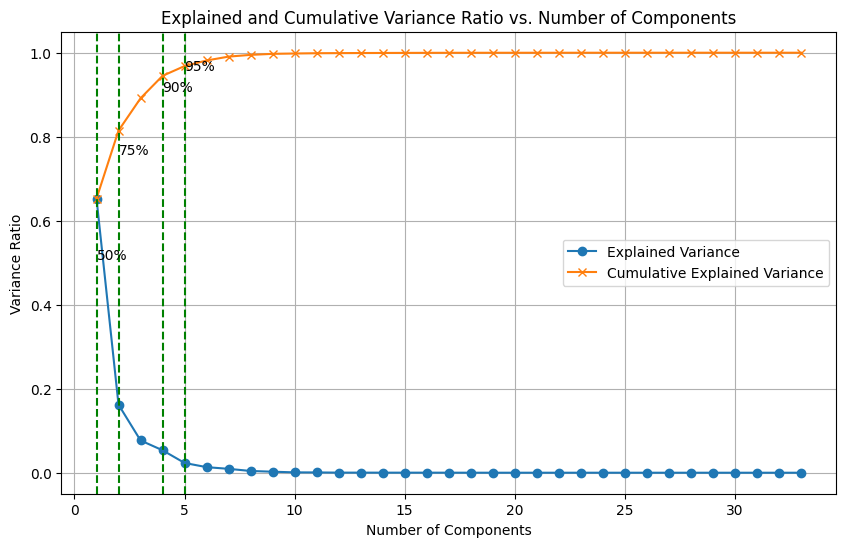

In [ ]:
## Visualize the cumulative and explained variance

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, label='Explained Variance', marker='o')
plt.plot(range(1, len(explained_variance_cummulative) + 1), explained_variance_cummulative, label='Cumulative Explained Variance', marker='x')
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.title('Explained and Cumulative Variance Ratio vs. Number of Components')
plt.legend()

thresholds = [0.5, 0.75, 0.9, 0.95]
for threshold in thresholds:
    n_components = np.argmax(explained_variance_cummulative >= threshold) + 1
    plt.axvline(x=n_components, color='green', linestyle='--', label=f'{threshold*100:.0f}% Variance Explained at {n_components} components')
    print(f"Number of components for {threshold*100:.0f}% explained variance: {n_components}")
    plt.text(n_components, threshold, f'{threshold*100:.0f}%', ha='left', va='bottom')

plt.grid(True)
plt.show()

It appears that we could reduce the number of components down to 10 with near 100% explained variance and down to 5 95% variance. This is a significant reduction from the max input of 33.

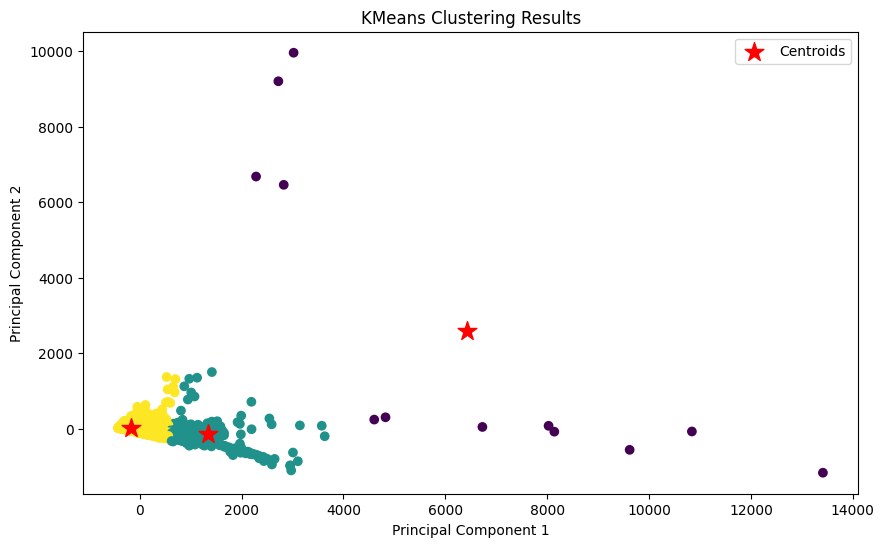

In [ ]:
## Using pca, downscale data_train to 10 components, then fit a kmeans model on this data for 3 clusters

pca = PCA(n_components = 10)
data_train_pca = pca.fit_transform(data_train)
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(data_train_pca)

# Get predicted labels and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Create the plot
plt.figure(figsize = (10, 6))
plt.scatter(data_train_pca[:, 0], data_train_pca[:, 1], c = labels, cmap = 'viridis') # Use first two principal components for visualization
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 200, c = 'red', marker = '*', label = 'Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering Results")
plt.legend()
plt.show()

Based on the initial clustering result, there was a bit of an arbitrary cutoff between 2 of the clusters, however it did catch outliers in the y-axis. However, outliers on the x-axis are not being grouped. We will try using 4 clusters instead:

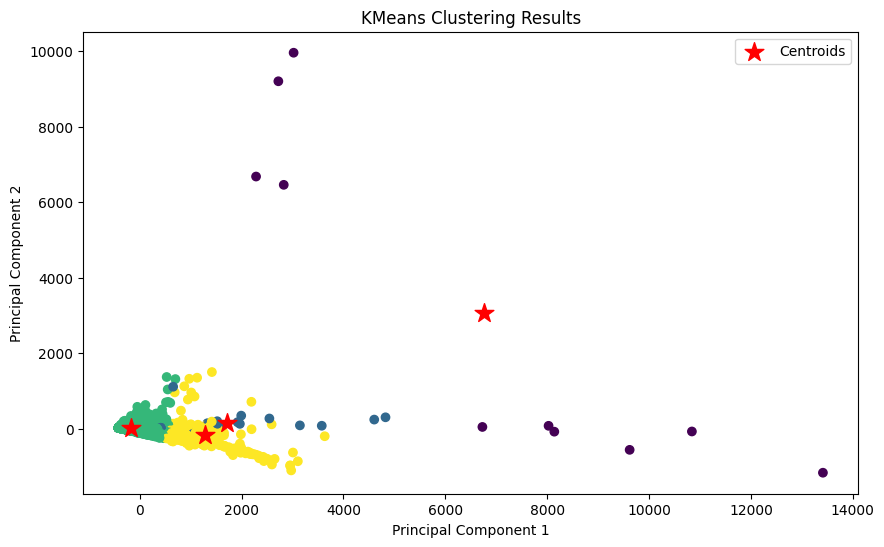

In [ ]:
## Using pca, downscale data_train to 10 components, then fit a kmeans model on this data for 4 clusters

pca = PCA(n_components = 10)
data_train_pca = pca.fit_transform(data_train)
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(data_train_pca)

# Get predicted labels and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(data_train_pca[:, 0], data_train_pca[:, 1], c = labels, cmap = 'viridis') # Use first two principal components for visualization
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 200, c = 'red', marker = '*', label = 'Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering Results")
plt.legend()
plt.show()

The cutoff using 4 clusters is more reasonable. A loop will now be used to repeat the above experiment using clusters numbers of 3-7 to determine the best number of clusters.

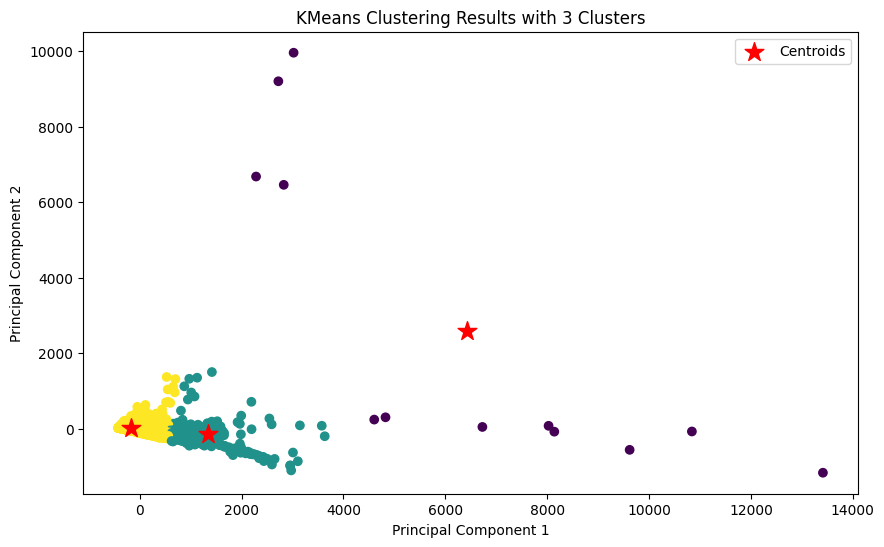

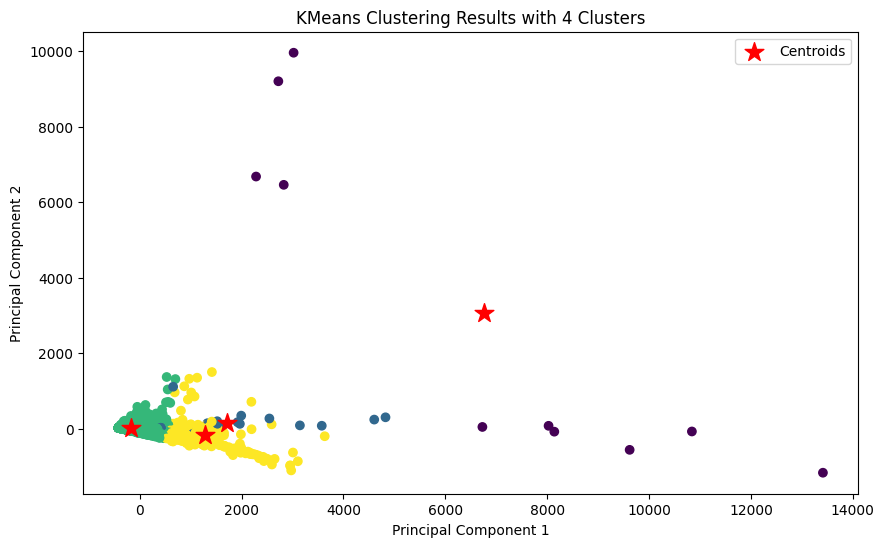

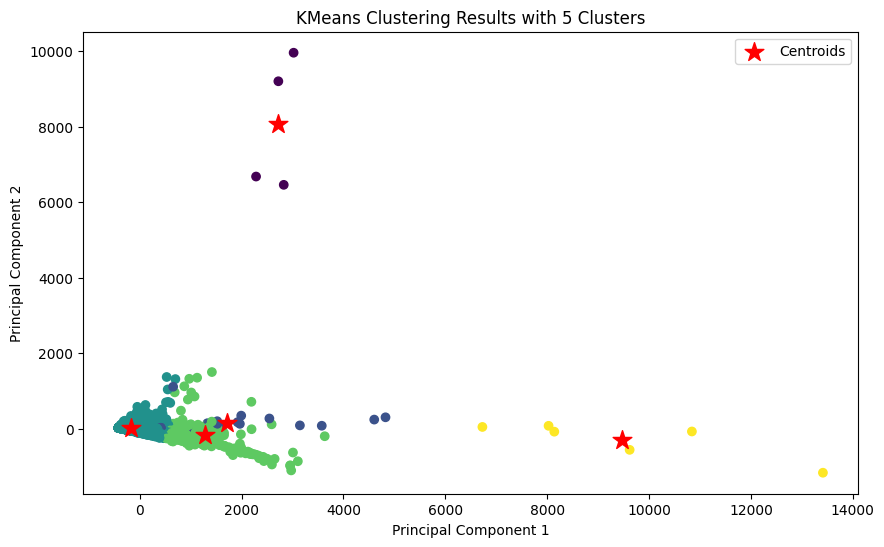

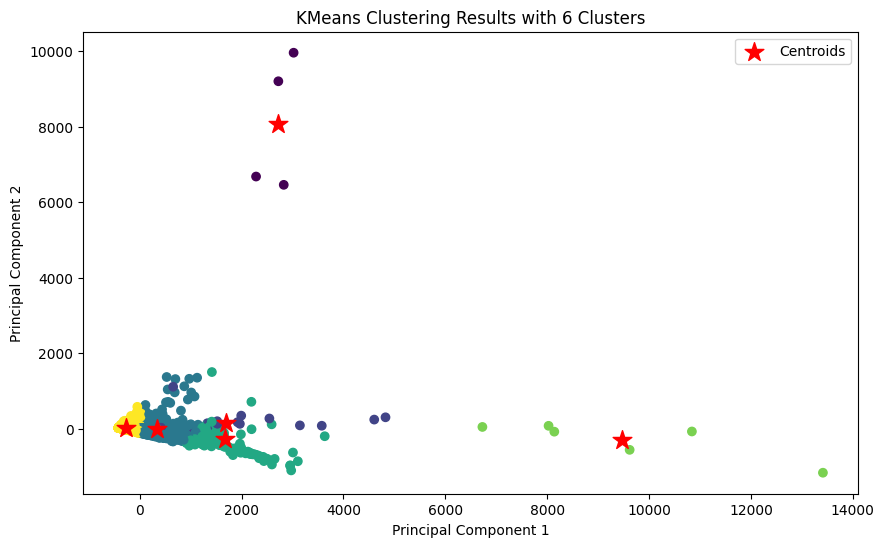

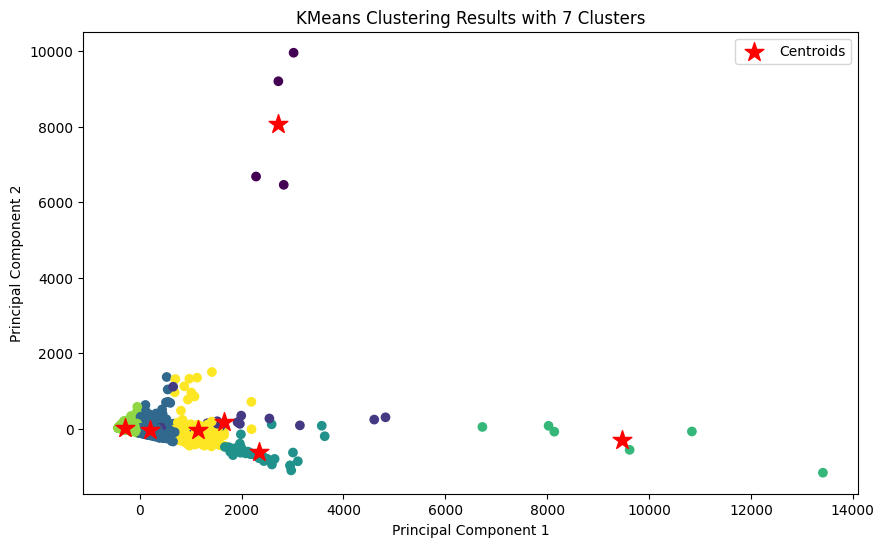

In [ ]:
## Use a loop to generate charts for above the code using number of clusters in the range of 3 through 8. Again using 10 components via PCA.

pca = PCA(n_components = 10)
data_train_pca = pca.fit_transform(data_train)

for n_clusters in range(3, 8):
    print(f"Number of clusters: {n_clusters}")
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
    kmeans.fit(data_train_pca)

    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    plt.figure(figsize=(10, 6))
    plt.scatter(data_train_pca[:, 0], data_train_pca[:, 1], c = labels, cmap = 'viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 200, c = 'red', marker = '*', label = 'Centroids')

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"KMeans Clustering Results with {n_clusters} Clusters")
    plt.legend()
    plt.show()

Based on the results, 5 clusters appears to distinguish the varying densities of data. Anything higher results in notable overlap as indicated by the centroid placement. Due to this, 5 clusters will be used and the test data will be re converted into 5 buckets.

In [ ]:
## Using a copy dataframe, convert the nutrition density column into 5 classes in a new "Nutrition Ranking" column based on the kmeans clustering results using 5 clusters.

# Create a copy of the DataFrame
data_copy = data.copy()

# Apply KMeans clustering to the 'Nutrition Density' column (assuming 'data_train' contains relevant features)
pca = PCA(n_components = 10)
data_train_pca = pca.fit_transform(data_train)
kmeans = KMeans(n_clusters = 5, random_state = 0)  # Use 5 clusters
kmeans.fit(data_train_pca)
data_copy['Nutrition Ranking'] = kmeans.labels_

# Display the updated DataFrame with the new 'Nutrition Ranking' column
data_copy

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Nutrition Ranking
0,eggnog,224,10.600,6.600,3.300,0.500,20.4,20.400,11.600,0.000,...,0.051,0.500,48.300,0.024,276.900,419.1,0.094,1.200,377.200,2
1,beer light,96,0.000,0.000,0.000,0.000,5.4,0.300,0.800,0.000,...,0.095,0.014,16.500,0.094,39.600,69.3,0.077,0.044,19.456,2
2,beer budweiser,12,0.000,0.000,0.000,0.000,0.9,0.000,0.100,0.000,...,0.095,0.000,2.100,0.038,3.800,9.7,0.000,0.000,2.200,2
3,weizenbier erdinger,220,18.000,13.000,1.000,0.000,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,18.000,2
4,beer light budweiser,9,0.000,0.000,0.000,0.000,0.4,0.000,0.066,0.000,...,0.088,0.000,2.100,0.007,3.200,7.7,0.000,0.000,1.320,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,0.500,0.000,...,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249,2
2391,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,0.062,0.089,...,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433,2
2392,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,0.400,0.400,...,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727,2
2393,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,1.800,1.100,...,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400,2


In [ ]:
## Using a copy dataframe, convert the nutrition density column into 5 classes in a new "Nutrition Ranking" column. To determine the cutoffs use histogram frequency values.

data_copy = data.copy()
hist, bin_edges = np.histogram(data["Nutrition Density"], bins = 5)
data_copy['Nutrition Ranking'] = pd.cut(data_copy['Nutrition Density'], bins = bin_edges, labels = False, include_lowest = True, duplicates = 'drop')
data_copy

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Nutrition Ranking
0,eggnog,224,10.600,6.600,3.300,0.500,20.4,20.400,11.600,0.000,...,0.051,0.500,48.300,0.024,276.900,419.1,0.094,1.200,377.200,1
1,beer light,96,0.000,0.000,0.000,0.000,5.4,0.300,0.800,0.000,...,0.095,0.014,16.500,0.094,39.600,69.3,0.077,0.044,19.456,0
2,beer budweiser,12,0.000,0.000,0.000,0.000,0.9,0.000,0.100,0.000,...,0.095,0.000,2.100,0.038,3.800,9.7,0.000,0.000,2.200,0
3,weizenbier erdinger,220,18.000,13.000,1.000,0.000,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,18.000,0
4,beer light budweiser,9,0.000,0.000,0.000,0.000,0.4,0.000,0.066,0.000,...,0.088,0.000,2.100,0.007,3.200,7.7,0.000,0.000,1.320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,0.500,0.000,...,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249,0
2391,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,0.062,0.089,...,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433,0
2392,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,0.400,0.400,...,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727,0
2393,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,1.800,1.100,...,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400,0


In [ ]:
Counter(data_copy['Nutrition Ranking'])

Counter({1: 111, 0: 2236, 4: 4, 2: 27, 3: 16})

In [ ]:
## Display statistics for nutrition ranking in the new data_copy dataframe for each ranking

nutrition_stats = data_copy.groupby('Nutrition Ranking').describe()
nutrition_stats

Caloric Value                                           \
                          count         mean          std    min     25%   
Nutrition Ranking                                                          
0                        2236.0   178.779964   232.252944    0.0   41.00   
1                         111.0   702.288288   555.086421   29.0  363.00   
2                          27.0   906.740741  1253.069941  188.0  314.50   
3                          16.0  1540.687500  1902.021967  159.0  490.50   
4                           4.0  2258.250000  2445.245233  235.0  295.75   

                                              Fat              ...    Zinc  \
                      50%     75%     max   count        mean  ...     75%   
Nutrition Ranking                                              ...           
0                   109.0   221.0  3336.0  2236.0    7.530692  ...   0.900   
1                   602.0   785.0  3683.0   111.0   33.939216  ...   5.850   
2                   402.0   640.5  5123.0    27.0   62.344444  ...   5.000   
3                   522.5  1610.0  6077.0    16.0   98.325000  ...  13.200   
4                  1753.0  3715.5  5292.0     4.0  127.275000  ...  21.725   

                         Nutrition Density                                     \
                     max             count         mean         std       min   
Nutrition Ranking                                                               
0                  147.3            2236.0    73.592453   72.938877     0.000   
1                   23.8             111.0   403.779153   84.349160   307.813   
2                   38.0              27.0   775.252778   95.316999   618.000   
3                   59.0              16.0  1028.644875   76.927592   928.400   
4                   69.8               4.0  1355.304250  122.645963  1264.074   

                                                              
                          25%        50%         75%     max  
Nutrition Ranking                                             
0                    15.74800    47.5000   111.11775   306.4  
1                   328.30000   378.5000   468.05000   609.4  
2                   702.05000   777.0000   852.65000   918.8  
3                   975.12025  1020.1025  1076.87500  1202.1  
4                  1281.00075  1311.8215  1386.12500  1533.5  

[5 rows x 272 columns]

In [ ]:
data_copy_train = data_copy.drop(columns = ["food", "Nutrition Density", "Nutrition Ranking"])
data_copy_test = data_copy["Nutrition Ranking"]

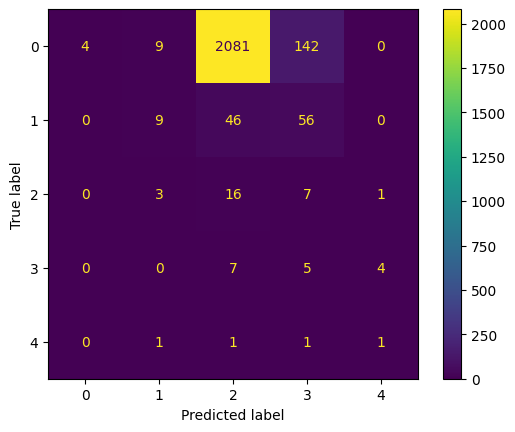

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2236
           1       0.41      0.08      0.14       111
           2       0.01      0.59      0.01        27
           3       0.02      0.31      0.04        16
           4       0.17      0.25      0.20         4

    accuracy                           0.01      2394
   macro avg       0.32      0.25      0.08      2394
weighted avg       0.95      0.01      0.01      2394



In [ ]:
## Using kmeans clustering with 5 clusters using data_copy_train, predict against data_copy_test and generate a confusion matrix of the results

pca = PCA(n_components = 10)
data_train_pca = pca.fit_transform(data_copy_train)
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(data_train_pca)
predictions = kmeans.predict(data_train_pca)

cm = confusion_matrix(data_copy_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(data_copy_test, predictions))

The classes 2 and 3 are being over predicted. I shall try gridsearch to improve the model.

Best KMeans parameters: KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=0)
Best F1-score: 0.4514405456725513


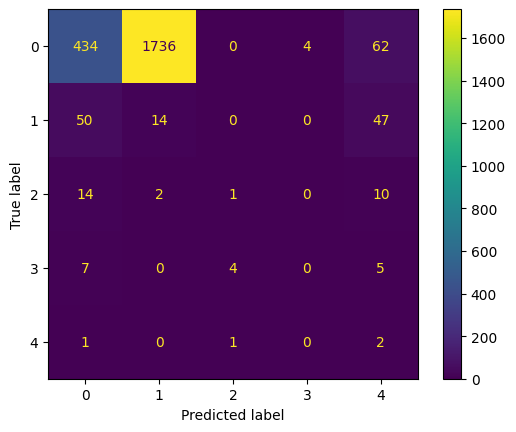

              precision    recall  f1-score   support

           0       0.86      0.19      0.32      2236
           1       0.01      0.13      0.02       111
           2       0.17      0.04      0.06        27
           3       0.00      0.00      0.00        16
           4       0.02      0.50      0.03         4

    accuracy                           0.19      2394
   macro avg       0.21      0.17      0.08      2394
weighted avg       0.80      0.19      0.30      2394



In [ ]:
## Use gridsearch on data_copy_train and data_copy_test for kmeans clustering that optimizes weighted average f1-score

param_grid = {
    'n_clusters': [5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [100, 300, 500, 1000],
    'algorithm': ['lloyd', 'elkan']
}

kmeans = KMeans(random_state = 0)
f1_scorer = make_scorer(f1_score, average = 'weighted')
grid_search = GridSearchCV(estimator = kmeans, param_grid = param_grid, scoring = f1_scorer, cv = 5)

pca = PCA(n_components = 10)
data_train_pca = pca.fit_transform(data_copy_train)
grid_search.fit(data_train_pca, data_copy_test)


best_kmeans = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best KMeans parameters:", best_kmeans)
print("Best F1-score:", best_score)

predictions = best_kmeans.predict(data_train_pca)

cm = confusion_matrix(data_copy_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()
print(classification_report(data_copy_test, predictions))

The result is better, labels for 0 (best nutrition) are being increasingly predicted. However, it is still being confused with class 1. Other models may give a better result.

#### Agglomerative Clustering

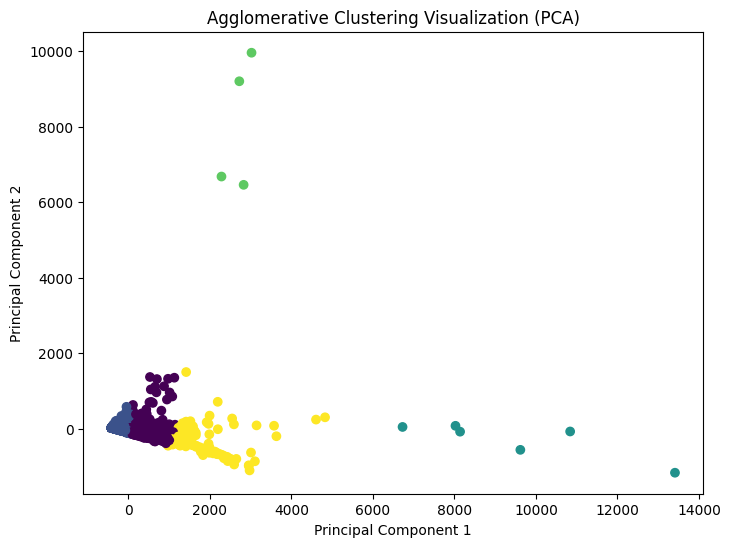

In [ ]:
## Use agglomerative clustering to cluster data_copy_train using 5 clusters. Then display a chart visualizing the clusters

agg_clustering = AgglomerativeClustering(n_clusters = 5)
agg_clustering.fit(data_copy_train)

pca = PCA(n_components = 10)
data_pca = pca.fit_transform(data_copy_train)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = predictions, cmap = 'viridis')
plt.title('Agglomerative Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Agglomerative clustering gives a very similar cluster group as kmeans clustering. I will now repeat the classification and model optimization experiments.

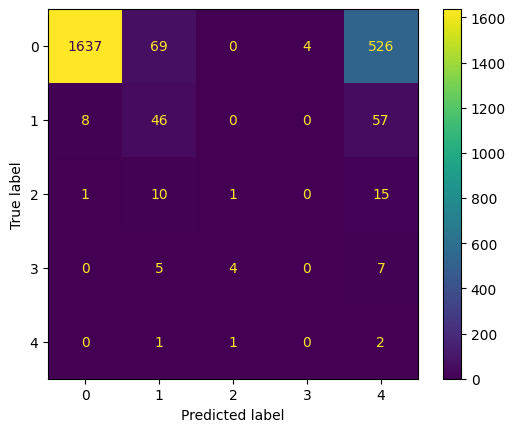

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2236
           1       0.35      0.41      0.38       111
           2       0.17      0.04      0.06        27
           3       0.00      0.00      0.00        16
           4       0.00      0.50      0.01         4

    accuracy                           0.70      2394
   macro avg       0.30      0.34      0.26      2394
weighted avg       0.95      0.70      0.81      2394



In [ ]:
## Use agglomerative clustering at 5 clusters to predict on data_copy_test. generated a classification report and confusion matrix.

agg_clustering = AgglomerativeClustering(n_clusters = 5)
agg_clustering.fit(data_train_pca)
agg_predictions = agg_clustering.fit_predict(data_train_pca)

cm = confusion_matrix(data_copy_test, agg_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=  cm)
disp.plot()
plt.show()
print(classification_report(data_copy_test, agg_predictions))

The initial agglomerative clustering approach is vastly better than kmeans. Notably labels 0 and 1 have a higher f1-score. While class 1 is still low, it is important to note that given a total observation count of 2394, a baseline model would only predict 1 correctly 111/2394 = 0.046 or 4.6% of the time, where as here the score is 38%.

Gridsearch will now be used to optimize the model:

In [ ]:
## Reusing code from earlier weeks

def get_best_accuracy_score(ytdf, yp, n = 5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy.
    Example output: (3, 4, 1, 2, 0), 0.74
    """
    best_perm = None
    best_accuracy = 0
    min_val = min(yp)
    max_val = max(yp) + 1
    labs = list(set(ytdf))
    for perm in list(itertools.permutations(labs)):
        perm_dict = dict.fromkeys(range(min_val, max_val), None)
        key = 0
        for val in perm_dict:
            perm_dict[key] = perm[key]
            key += 1
        mapped_labels = [perm_dict.get(value, value) for value in yp]
        accuracy = accuracy_score(ytdf, mapped_labels)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
    return best_accuracy

def get_best_preds(ytdf, yp, n = 5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy.
    Example output: (3, 4, 1, 2, 0), 0.74
    """
    best_perm = None
    best_accuracy = 0
    best_labels = []
    min_val = min(yp)
    max_val = max(yp) + 1
    labs = list(set(ytdf))
    for perm in list(itertools.permutations(labs)):
        perm_dict = dict.fromkeys(range(min_val, max_val), None)
        key = 0
        for val in perm_dict:
            perm_dict[key] = perm[key]
            key += 1
        mapped_labels = [perm_dict.get(value, value) for value in yp]
        accuracy = accuracy_score(ytdf, mapped_labels)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_perm = perm_dict
            best_labels = mapped_labels
    best_perm = dict((val, key) for key, val in best_perm.items())
    return best_labels

Linkage: single, Distance: euclidean, Accuracy 0.9327485380116959
Linkage: single, Distance: manhattan, Accuracy 0.9331662489557226
Linkage: single, Distance: cosine, Accuracy 0.9323308270676691
Linkage: single, Distance: l1, Accuracy 0.9331662489557226
Linkage: single, Distance: l2, Accuracy 0.9327485380116959
Linkage: complete, Distance: euclidean, Accuracy 0.9352548036758563
Linkage: complete, Distance: manhattan, Accuracy 0.9269005847953217
Linkage: complete, Distance: cosine, Accuracy 0.6123642439431913
Linkage: complete, Distance: l1, Accuracy 0.9269005847953217
Linkage: complete, Distance: l2, Accuracy 0.9352548036758563
Linkage: average, Distance: euclidean, Accuracy 0.9348370927318296
Linkage: average, Distance: manhattan, Accuracy 0.9344193817878028
Linkage: average, Distance: cosine, Accuracy 0.6854636591478697
Linkage: average, Distance: l1, Accuracy 0.9344193817878028
Linkage: average, Distance: l2, Accuracy 0.9348370927318296
Linkage: ward, Distance: euclidean, Accuracy 0

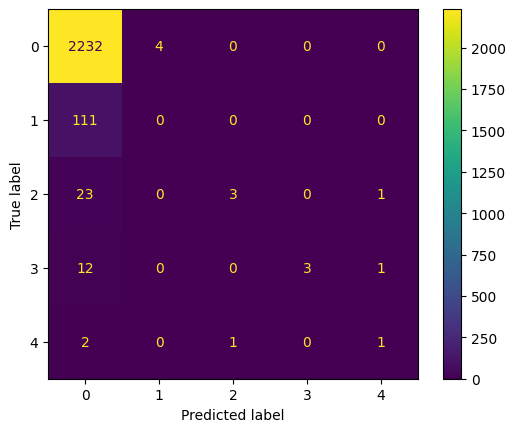

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2236
           1       0.00      0.00      0.00       111
           2       0.75      0.11      0.19        27
           3       1.00      0.19      0.32        16
           4       0.33      0.25      0.29         4

    accuracy                           0.94      2394
   macro avg       0.60      0.31      0.35      2394
weighted avg       0.89      0.94      0.91      2394



In [ ]:
## Reusing code from earlier weeks

linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'l1', 'l2']

def get_best_model(linkage, distance):
    new_model = AgglomerativeClustering(linkage = linkage, metric = distance, n_clusters = 5).fit(data_train_pca)
    best_accuracy = get_best_accuracy_score(data_copy_test, new_model.labels_)
    print(f"Linkage: {linkage}, Distance: {distance}, Accuracy {best_accuracy}")
    return best_accuracy

best_linkage = linkage_methods[0]
best_distance = distance_metrics[0]
best_accuracy = 0
for linkage in linkage_methods:
    for distance in distance_metrics:
        if linkage == 'ward' and distance != 'euclidean':
            continue
        accuracy = get_best_model(linkage, distance)
        if accuracy > best_accuracy:
            best_linkage = linkage
            best_distance = distance
            best_accuracy = accuracy

print(f"Final Best Parameters -> Linkage: {linkage}, Distance: {distance}, Accuracy {best_accuracy}")
best_model = AgglomerativeClustering(linkage = best_linkage, metric = best_distance, n_clusters = 5).fit(data_train_pca)
best_preds = get_best_preds(data_copy_test, best_model.labels_)

cm = confusion_matrix(data_copy_test, best_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(data_copy_test, best_preds))

The gridsearch results in a 10% better model using parameters Linkage: ward and Distance: l2. Most of the 0 label classes are predicted now. However, this is partially due to the majority of classes being predicted as 0. A model that can better distinguish these smaller classes would be optimal.

#### Matrix Decomposition
Reusing code from earlier weeks

In [ ]:
nmf_model = NMF(n_components = len(set(data_copy_test)))
preds = nmf_model.fit_transform(data_copy_train).argmax(axis = 1)
preds

array([0, 4, 4, ..., 3, 0, 3])

In [ ]:
def find_best_cluster_mapping(preds, actuals, nmf_model):

    permutation_scores = []
    permutations = itertools.permutations(range(0, len(set(data_copy_test))))

    for permutation in permutations:
        mappings_dict = dict(zip(list(set(actuals)), permutation))
        actuals_mapped= actuals.replace(mappings_dict)
        accuracy = accuracy_score(actuals_mapped, preds)
        permutation_scores.append([permutation, accuracy])

    best_score = sorted(permutation_scores, key = lambda x:x[1])[-1]

    return best_score, list(set(actuals))

In [ ]:
label_predictions = find_best_cluster_mapping(preds, data_copy_test, len(data_copy_test.unique()))
print(f'The accuracy for the best permutation is approximately: {round(label_predictions[0][1], 4)} for the following permutation:')
best_permutation = pd.DataFrame({"Cluster": label_predictions[0][0], "Category": label_predictions[1]}).set_index("Cluster")
best_permutation

The accuracy for the best permutation is approximately: 0.5092 for the following permutation:


,Category
Cluster,
4,0
0,1
3,2
2,3
1,4


The results using the default model provided a best accuracy of approximately:
0.5092.

Gridsearch will now be performed to increase the score:

In [ ]:
init_list = ['nndsvd', 'nndsvda', 'nndsvdar', 'random']
solver_list = ['cd', 'mu']
loss_list = ['frobenius', 'kullback-leibler', 'itakura-saito']
max_iter_list = [100, 200, 500, 1000, 1500, 2000]
l1_ratio_list = [0.0, 0.33, 0.66, 1.0]

param_grid = {
    'n_components': [len(set(data_copy_test))],
    'init': init_list,
    'solver': solver_list,
    'beta_loss': loss_list,
    'max_iter': max_iter_list,
    'l1_ratio': l1_ratio_list,
    'random_state': [0]
}

best_params = {}
best_accuracy = 0

for params in ParameterGrid(param_grid):
    nmf_model = NMF(**params)
    try:
      preds = nmf_model.fit_transform(data_copy_train).argmax(axis=1)
    except: # skip invalid combinations for gridsearch
      continue
    label_predictions = find_best_cluster_mapping(preds, data_copy_test, len(data_copy_test.unique()))
    best_map = label_predictions[1]
    accuracy = label_predictions[0][1]

    print(f"Parameters: {params}, Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_mapping = best_map

print(f"\nBest parameters: {best_params}")
print(f"Best accuracy: {best_accuracy}")
print(f"Best mapping: {best_mapping}")

Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 100, 'n_components': 5, 'random_state': 0, 'solver': 'cd'}, Accuracy: 0.40016708437761067
Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 100, 'n_components': 5, 'random_state': 0, 'solver': 'mu'}, Accuracy: 0.4139515455304929
Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 200, 'n_components': 5, 'random_state': 0, 'solver': 'cd'}, Accuracy: 0.4018379281537176
Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 200, 'n_components': 5, 'random_state': 0, 'solver': 'mu'}, Accuracy: 0.4139515455304929
Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 500, 'n_components': 5, 'random_state': 0, 'solver': 'cd'}, Accuracy: 0.3989139515455305
Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 500, 'n_components': 5, 'random_state'

Using Gridsearch, the best NMF model used the parameters:  {'beta_loss': 'frobenius', 'init': 'nndsvda', 'l1_ratio': 0.0, 'max_iter': 100, 'n_components': 5, 'random_state': 0, 'solver': 'cd'} with an accuracy of approximately 0.5092 (50.92%). This indicates that the default model just was as good. To ensure proper f1-score comparison with other models. A classification report and confusion matrix will now again be visualized.

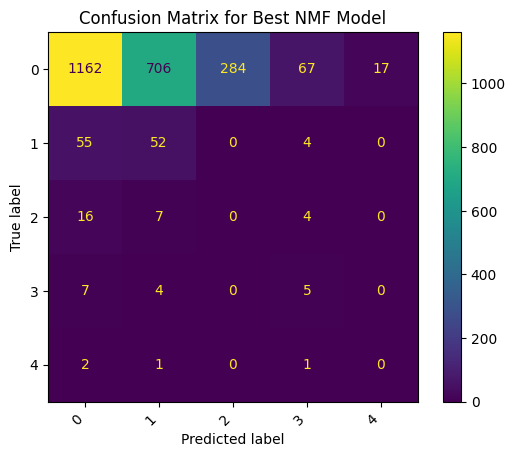

              precision    recall  f1-score   support

           0       0.94      0.52      0.67      2236
           1       0.07      0.47      0.12       111
           2       0.00      0.00      0.00        27
           3       0.06      0.31      0.10        16
           4       0.00      0.00      0.00         4

    accuracy                           0.51      2394
   macro avg       0.21      0.26      0.18      2394
weighted avg       0.88      0.51      0.63      2394



In [ ]:
## Display a confusion matrix along with associated classification report demonstrating the best NMF model's performance

best_params =  {'beta_loss': 'frobenius', 'init': 'nndsvda', 'l1_ratio': 0.0, 'max_iter': 100, 'n_components': 5, 'random_state': 0, 'solver': 'cd'}
nmf_model = NMF(**best_params)
preds = nmf_model.fit_transform(data_copy_train).argmax(axis=1)
label_predictions = find_best_cluster_mapping(preds, data_copy_test, len(data_copy_test.unique()))
best_permutation = pd.DataFrame({"Cluster": label_predictions[0][0], "Category": label_predictions[1]}).set_index("Cluster")
predicted_labels = pd.Series(preds).replace(dict(zip(best_permutation.index, best_permutation.Category)))

cm = confusion_matrix(data_copy_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=np.unique(data_copy_test))
disp.plot()
plt.title("Confusion Matrix for Best NMF Model")
plt.xticks(rotation = 45, ha = 'right')
plt.show()
print(classification_report(data_copy_test, predicted_labels))

The NMF approach appears to have difficulty distinguishing label 0 (best nutrition) classes. It will also not be a contender for best approach.

#### Logistic Regression

I will fit a supervised model in the form of logisitic regression as a means of comparing the model against the previous unsupervised approaches.

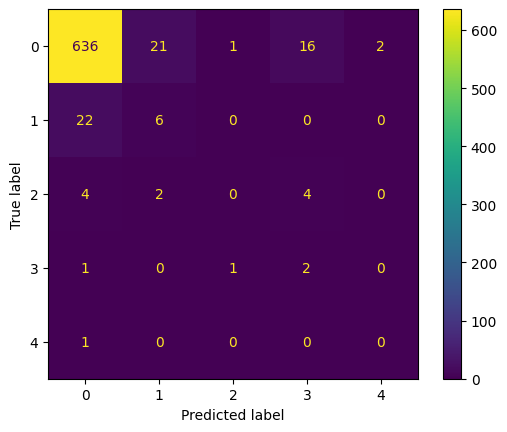

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       676
           1       0.21      0.21      0.21        28
           2       0.00      0.00      0.00        10
           3       0.09      0.50      0.15         4
           4       0.00      0.00      0.00         1

    accuracy                           0.90       719
   macro avg       0.25      0.33      0.26       719
weighted avg       0.91      0.90      0.90       719



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_copy_train, data_copy_test, test_size = 0.3, random_state = 0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

Best Logistic Regression parameters: LogisticRegression(C=5, max_iter=1000, penalty='l1', solver='liblinear')
Best F1-score: 0.9616218985362316


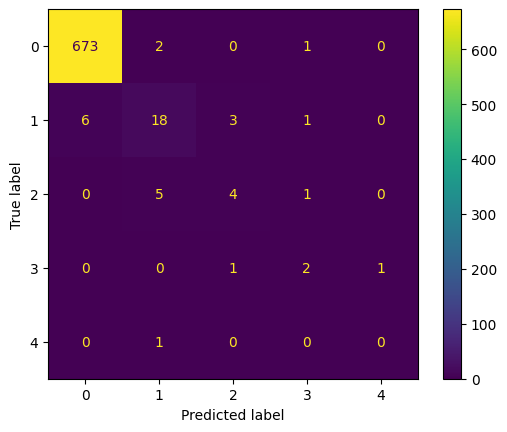

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       676
           1       0.69      0.64      0.67        28
           2       0.50      0.40      0.44        10
           3       0.40      0.50      0.44         4
           4       0.00      0.00      0.00         1

    accuracy                           0.97       719
   macro avg       0.52      0.51      0.51       719
weighted avg       0.97      0.97      0.97       719



In [ ]:
## Gridsearch for thelogistic regression model to optimize the f1-score
## then prints a confusion matrix and classification report based on the results of the best model.

X_train, X_test, y_train, y_test = train_test_split(data_copy_train, data_copy_test, test_size = 0.3, random_state = 0)

param_grid = {
    'C': [0.1, 1, 5],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 1000]
}

model_logistic = LogisticRegression()
f1_scorer = make_scorer(f1_score, average = 'weighted')

grid_search = GridSearchCV(estimator = model_logistic, param_grid = param_grid, scoring = f1_scorer, cv = 5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Logistic Regression parameters:", best_model)
print("Best F1-score:", best_score)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

Gridsearch has improved the f1-score by 8%, resulting in a 0.97 weighted average (noting the caveat that a train test split was used and I am not using the full test data that was predicted on for the unsupervised approaches). This is better than the unsupervised approaches, I also found in some of the previous week's assignments. The model was very good at capturing the best nutritional value (0) class and quite good with class 1. It performed decently on class 2 given the small proportion, though for classes 3 and 4 the support is too low to give an accurate assessment.

### Discussion and Conclusion
To summarize the results, the 3 unsupervised and 1 supervised model acheived the following weighted average f1-score results via their best model from gridsearch:

* Kmeans Clustering: 0.3
* Agglomerative Clustering: 0.91
* Matrix Decomposition: 0.63
* Logistic Regression: 0.97

The best model was logistic regression, properly classifying nearly all best nutritional value foods as such while also correctly identifying a reasonable proportion of the smaller classes. Following that closely was agglomerative clustering, though due to the over predicting of the majority class. Matrix docomposition had the issue of confusing class 0, resulting in its moderate score. Finally, kmeans performed poorly.

Determining the nutritional density categorical rankings required some EDA / iteration through visualizing clusters in a PCA reduced plane. This resulted in 5 clusters being the final value. The purpose of creating categorical rankings was so that scoring metrics could be used and so that the unsupervised approaches could be compared against supervised ones. Also noting that from the base 30+ input features, most of the variance could be explained by 5-10 features (1/6 to 1/3 of initial set) depending on if a desired 95% or 99% variance is desired from PCA. The reduction in features enabled the algorithms to run much faster.

#### Potential Improvement

Ways in which this experiment could be improved include:

* Finding a dataset with predermined categorical rankings, since they may be more scientifically adequate in terms of proportioning / grouping foods in the first place. This would also provide the exact number of clusters to use, removing the potential suboptimal cluster number result for classification.
* Comparing against more supervised models, including more train - test split variations to ensure a fair f1-score assessment is used.
* More parameters could be used for gridsearch to ensure the best model is found.
* More data exploration and experimentation in terms of feature engineering / transformation could be attempted (aside from PCA).

